In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, and_, select

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(autoload_with=engine)
# reflect the tables


In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
session.query(func.max(Measurement.date)).scalar()

'2017-08-23'

In [11]:
# Column names and data types for Measurement table
inspector = inspect(engine)
columns = inspector.get_columns('Measurement')
for c in columns:
    print(c['name'], c['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [12]:
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set. 

# Perform a query to retrieve the data and precipitation scores 
one_year_ago = dt.datetime(2017, 8, 23) - dt.timedelta(days=365)
results = session.query(Measurement.prcp, Measurement.date).filter(and_(Measurement.date >= one_year_ago, Measurement.date <= dt.datetime(2017, 8, 23))).all()


In [13]:
results

[(0.08, '2016-08-24'),
 (0.08, '2016-08-25'),
 (0.0, '2016-08-26'),
 (0.0, '2016-08-27'),
 (0.01, '2016-08-28'),
 (0.0, '2016-08-29'),
 (0.0, '2016-08-30'),
 (0.13, '2016-08-31'),
 (0.0, '2016-09-01'),
 (0.0, '2016-09-02'),
 (0.0, '2016-09-03'),
 (0.03, '2016-09-04'),
 (None, '2016-09-05'),
 (None, '2016-09-06'),
 (0.05, '2016-09-07'),
 (0.0, '2016-09-08'),
 (0.03, '2016-09-09'),
 (0.0, '2016-09-10'),
 (0.05, '2016-09-11'),
 (0.0, '2016-09-12'),
 (0.02, '2016-09-13'),
 (1.32, '2016-09-14'),
 (0.42, '2016-09-15'),
 (0.06, '2016-09-16'),
 (0.05, '2016-09-17'),
 (0.0, '2016-09-18'),
 (0.0, '2016-09-19'),
 (0.0, '2016-09-20'),
 (0.0, '2016-09-21'),
 (0.02, '2016-09-22'),
 (0.0, '2016-09-23'),
 (0.0, '2016-09-24'),
 (0.0, '2016-09-25'),
 (0.06, '2016-09-26'),
 (0.02, '2016-09-27'),
 (0.0, '2016-09-28'),
 (0.0, '2016-09-29'),
 (0.0, '2016-09-30'),
 (0.0, '2016-10-01'),
 (0.0, '2016-10-02'),
 (0.0, '2016-10-03'),
 (0.0, '2016-10-04'),
 (0.0, '2016-10-05'),
 (0.0, '2016-10-06'),
 (0.0, '2016-1

In [14]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names
# Sort the dataframe by date 
results_df = pd.DataFrame(results)
results_df.columns = ['Precipitation', 'Date']
results_df

,Precipitation,Date
0,0.08,2016-08-24
1,0.08,2016-08-25
2,0.00,2016-08-26
3,0.00,2016-08-27
4,0.01,2016-08-28
...,...,...
2218,0.09,2017-08-19
2219,NaN,2017-08-20
2220,0.56,2017-08-21
2221,0.50,2017-08-22


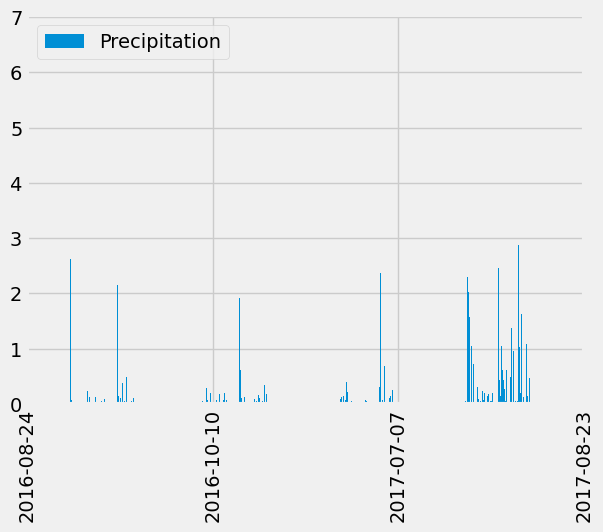

In [17]:
# Use Pandas Plotting with Matplotlib to plot the data
bargraph = results_df.plot.bar()
x_ticks = np.linspace(0, len(results_df)-1, len(results_df)//500, dtype=int)
plt.xticks(x_ticks, [results_df['Date'][i] for i in x_ticks])
plt.show()

In [15]:
# Use Pandas to calculate the summary statistics for the precipitation data
results_df.describe()

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [16]:
# Column names and data types for Station table
inspector = inspect(engine)
columns = inspector.get_columns('Station')
for c in columns:
    print(c['name'], c['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [18]:
# Design a query to calculate the total number of stations in the dataset
count = session.query(Station).distinct(Station.station).count()
count

9

In [20]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_counts = session.query(Measurement.station, func.count(Measurement.station)).\
                                                group_by(Measurement.station).\
                                                order_by(func.count(Measurement.station).desc())
station_counts_df = pd.DataFrame(station_counts, columns=['station id','# of measurements'])
station_counts_df

,station id,# of measurements
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [22]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active = session.query(Measurement.station, func.min(Measurement.tobs),
                                      func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
                                        filter(Measurement.station == station_counts[0][0])
pd.DataFrame(most_active, columns=['Station ID','min temp','max temp','avg temp'])

,Station ID,min temp,max temp,avg temp
0,USC00519281,54.0,85.0,71.663781


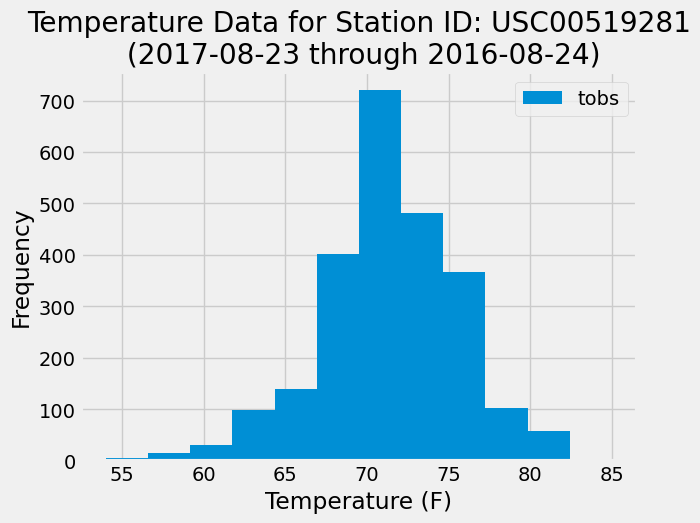

In [29]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_data = session.query(Measurement.station, Measurement.date, Measurement.tobs)\
                    .filter(Measurement.date <= one_year_ago)\
                    .filter(Measurement.station == station_counts[0][0])\
                    .all()
temp_df = pd.DataFrame(temp_data, columns=['Station ID','Date','tobs'])

temp_df.plot(kind='hist', bins=12)
plt.xlabel('Temperature (F)')
plt.title('Temperature Data for Station ID: USC00519281\n (2017-08-23 through 2016-08-24)')
plt.show()

# Close Session

In [30]:
# Close Session
session.close()